## Kernel Trick in classification
## in this project I use logistic regression, KNN, and decision trees classifiers 
## I apply kernel trick for all classifications and check the score and also classification report (precision, recall, accuracy, f1, ...) 
## at the begining I represent how Kernel Trick works 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import classification_report
set_config(display="diagram")
warnings.filterwarnings('ignore')

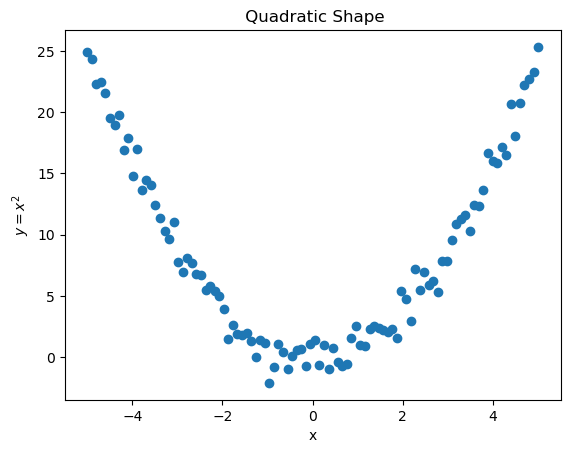

In [78]:
## At first I create a data set to apply linear regression and check the effect of kernel trick 
x1 = np.linspace(-5, 5, 100)
def quad_x1(x1): return x1**2 + np.random.normal(size = len(x1))
plt.scatter(x1, quad_x1(x1))
plt.xlabel ("x")
plt.ylabel(r"$y = x^2$")
plt.title(' Quadratic Shape');

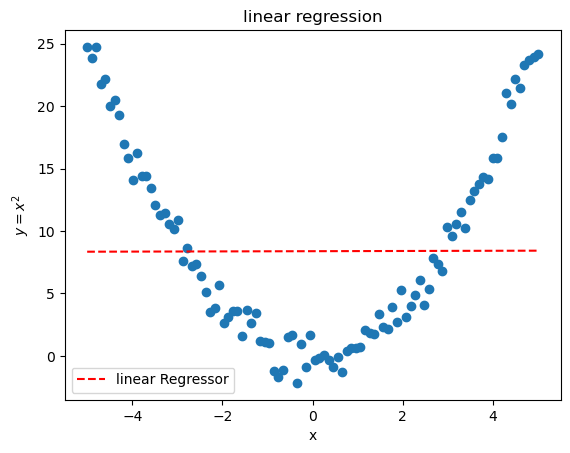

In [5]:
# here I check the linear regression without kernel trick 
lr_normal  = LinearRegression().fit(x1.reshape (-1,1), quad_x1(x1))
plt.plot(x1, lr_normal.predict(x1.reshape (-1,1)), '--r', label = 'linear Regressor')
plt.scatter(x1, quad_x1(x1))
plt.xlabel ("x")
plt.ylabel(r"$y = x^2$")
plt.title('linear regression')
plt.legend(); 

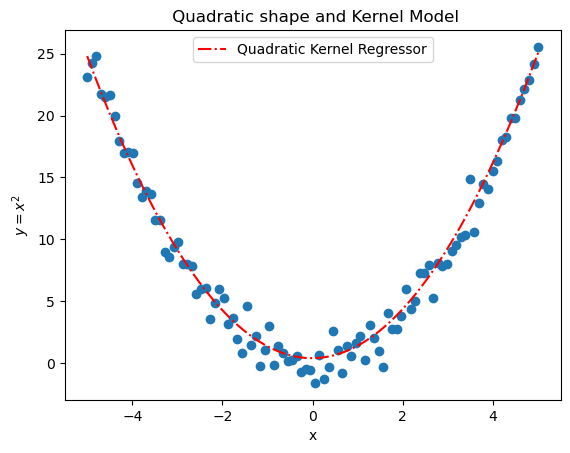

In [79]:
# now I apply kerenl for x1
#polynomial kernel
k_x1 = polynomial_kernel(x1.reshape(-1, 1), x1.reshape(-1, 1), degree = 2)
#fit regressor on kernel data
lr = LinearRegression().fit(k_x1, quad_x1(x1))

#visualize the predictions
plt.plot(x1, lr.predict(k_x1), '-.r', label = 'Quadratic Kernel Regressor')
plt.scatter(x1, quad_x1(x1))
plt.xlabel ("x")
plt.ylabel(r"$y = x^2$")
plt.title(' Quadratic shape and Kernel Model')
plt.legend();

## Second Section:
## The effect of Kernel Trick on classification 

In [7]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [8]:
X.shape, y.shape

((178, 13), (178,))

### I use logistic regression and check the score of classification with and without kernel trick 

In [9]:
lr_normal = LogisticRegression(max_iter = 1000).fit(X, y);
print("Score of logistic regression : {:.2f}".format ( lr_normal.score(X, y)));

ktrick_x = polynomial_kernel(X, X, degree = 1)
linear_logistic = LogisticRegression(max_iter = 1000).fit(ktrick_x, y);


### ANSWER CHECK
print("\nScore of logistic regression with kernel trick : {:.2f}".format( linear_logistic.score(ktrick_x, y)));

Score of logistic regression : 0.98

Score of logistic regression with kernel trick : 0.97


## I check the effec of Kernel Trick on decision boundaries 

### At first I define some functions for kernel 

In [10]:
def Kernel_matrix(kfunc, X):
    N, _ = X.shape
    K = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kfunc(X[i, :], X[j, :])
    return K

In [11]:
def evaluate_kernel_model(model, kfunc, X_train, X_test):
    N1, _ = X_train.shape
    N2, _ = X_test.shape
    
    K = np.empty((N2, N1))
    for i in range(N2):
        for j in range(N1):
            K[i, j] = kfunc(X_train[j, :], X_test[i, :])
    return model.predict(K)

In [25]:
def linear_kernel_function(x, z):
    return np.dot(x, z)

## Now define train and test data and apply classifictions 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X[['total_phenols', 'color_intensity']].values, y, random_state = 42)

In [27]:
lr_kernel_matrix = Kernel_matrix(linear_kernel_function, X_train)

lr_kernel_logistic = LogisticRegression(max_iter=1000).fit(lr_kernel_matrix, y_train)

linear_predictions = evaluate_kernel_model(lr_kernel_logistic, linear_kernel_function, X_train, X_test)

### Linear kernel with logistic regression 

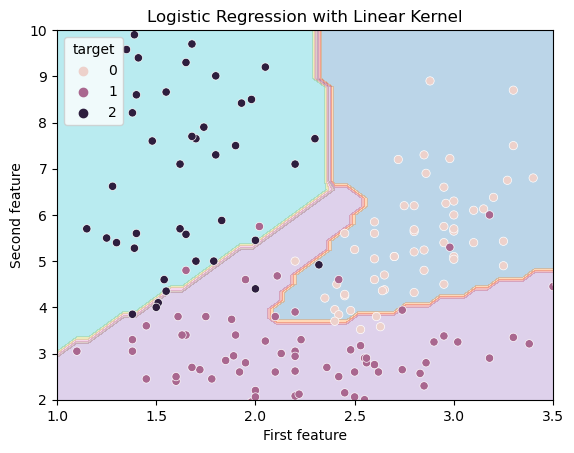

In [22]:
#myself: label in above code does not work then I can omit it: see in code 
## Uncomment to Visualize
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)

grid = np.c_[XX.ravel(), YY.ravel()]
#labels = evaluate_kernel_model(linear_logistic, linear_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('Logistic Regression with Linear Kernel')
plt.savefig('logistic regression with linear kernel')

In [74]:
acc1_linear_logistic =  lr_kernel_logistic.score (lr_kernel_matrix, y_train)
print ("score of logistic classification with linear kernel  is : {:.2f}".format (acc1_linear_logistic))


score of logistic classification with linear kernel  is : 0.91


In [75]:
cls_report= classification_report (y_train, lr_kernel_logistic.predict (lr_kernel_matrix))
print (cls_report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.89      0.91      0.90        53
           2       0.95      0.97      0.96        36

    accuracy                           0.91       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.91      0.91      0.91       133



### quantic kernel regression with logistic regression 

In [30]:
def quintic_kernel_function(x, z):
    return (np.dot(x, z) + 1) ** 5
quintic_kernel_matrix = Kernel_matrix(quintic_kernel_function, X_train)

quintic_logistic = LogisticRegression(max_iter=10000).fit(quintic_kernel_matrix, y_train)

quintic_predictions = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train, X_test)

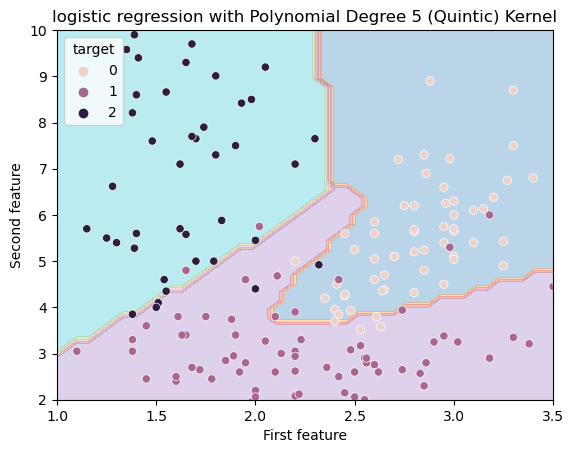

In [31]:
labels = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train, grid)
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('logistic regression with Polynomial Degree 5 (Quintic) Kernel');
plt.savefig('logistic regression with Polynomial Degree 5 (Quintic) Kernel')

In [33]:
acc1_Ql =  quintic_logistic.score (quintic_kernel_matrix, y_train)
print ("score of logistic classification with polynomial quantic kernel is : {:.2f}".format (acc1_Ql))

score of logistic classification with polynomial quantic kernel is : 0.91


In [73]:
cls_report= classification_report (y_train, quintic_logistic.predict (quintic_kernel_matrix))
print (cls_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.89      0.91      0.90        53
           2       0.94      0.89      0.91        36

    accuracy                           0.91       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.91      0.91      0.91       133



### Linear kernel with KNN  

In [34]:

lr_kernel_matrix = Kernel_matrix(linear_kernel_function, X_train)

knn_kernel= KNeighborsClassifier(n_neighbors=5).fit(lr_kernel_matrix, y_train)

knn_predictions = evaluate_kernel_model(knn_kernel, linear_kernel_function, X_train, X_test)

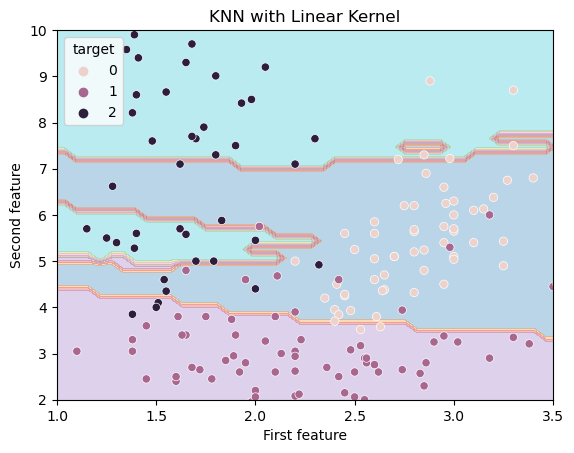

In [36]:
x = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)

grid = np.c_[XX.ravel(), YY.ravel()]
labels = evaluate_kernel_model(knn_kernel, linear_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('KNN with Linear Kernel')
plt.savefig('KNN with linear kernel')

In [39]:
acc1_KNN =  knn_kernel.score (lr_kernel_matrix, y_train)
print ("score of KNN classification with linear kernel  is : {:.2f}".format (acc1_KNN))

score of KNN classification with linear kernel  is : 0.85


In [72]:
cls_report= classification_report (y_train, knn_kernel.predict (lr_kernel_matrix))
print (cls_report)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        44
           1       0.94      0.87      0.90        53
           2       0.85      0.81      0.83        36

    accuracy                           0.85       133
   macro avg       0.85      0.85      0.85       133
weighted avg       0.86      0.85      0.85       133



### Quantic kernel regression with KNN 

In [42]:
def quintic_kernel_function(x, z):
    return (np.dot(x, z) + 1) ** 5
quintic_kernel_matrix = Kernel_matrix(quintic_kernel_function, X_train)

quintic_knn =KNeighborsClassifier(n_neighbors=5).fit(quintic_kernel_matrix, y_train)

quintic_predictions = evaluate_kernel_model(quintic_knn, quintic_kernel_function, X_train, X_test)

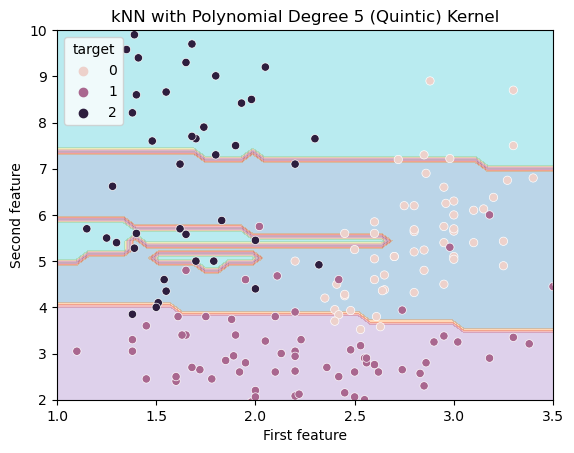

In [44]:
labels = evaluate_kernel_model(quintic_knn, quintic_kernel_function, X_train, grid)
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('kNN with Polynomial Degree 5 (Quintic) Kernel');
plt.savefig('KNN with Polynomial Degree 5 (Quintic) Kernel')

In [45]:
acc1_Qknn=  quintic_knn.score (quintic_kernel_matrix, y_train)
print ("score of KNN classification with polynomial quantic kernel is : {:.2f}".format (acc1_Ql))

score of KNN classification with polynomial quantic kernel is : 0.91


In [71]:
cls_report= classification_report (y_train, quintic_knn.predict (quintic_kernel_matrix))
print (cls_report)

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        44
           1       0.96      0.87      0.91        53
           2       0.83      0.69      0.76        36

    accuracy                           0.82       133
   macro avg       0.83      0.81      0.81       133
weighted avg       0.84      0.82      0.82       133



### Linear kernel with decision trees   

In [62]:
lr_dt_matrix = Kernel_matrix(linear_kernel_function, X_train)

kernel_dt = DecisionTreeClassifier(max_depth=5).fit(lr_dt_matrix, y_train)

dt_predictions = evaluate_kernel_model(kernel_dt, linear_kernel_function, X_train, X_test)


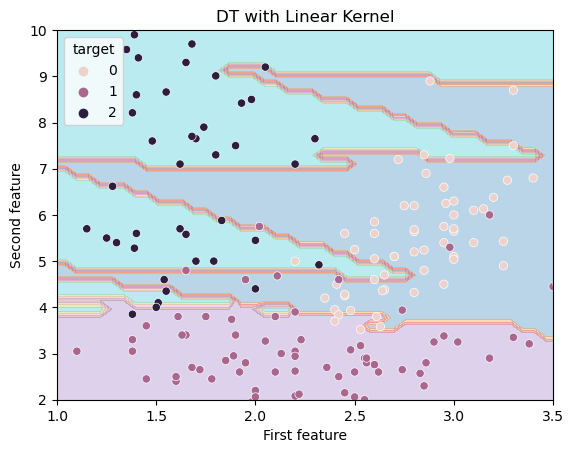

In [55]:
x = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)

grid = np.c_[XX.ravel(), YY.ravel()]
labels = evaluate_kernel_model(kernel_dt, linear_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('DT with Linear Kernel')
plt.savefig('DT with linear kernel')

In [57]:
acc1_DT =  kernel_dt.score (lr_dt_matrix, y_train)
print ("score of KNN classification with linear kernel  is : {:.2f}".format (acc1_DT))

score of KNN classification with linear kernel  is : 0.95


In [70]:
cls_report= classification_report (y_train, kernel_dt.predict (lr_dt_matrix))
print (cls_report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        44
           1       1.00      0.89      0.94        53
           2       0.97      1.00      0.99        36

    accuracy                           0.95       133
   macro avg       0.95      0.95      0.95       133
weighted avg       0.95      0.95      0.95       133



### Quantic kernel regression with decision trees  

In [58]:
def quintic_kernel_function(x, z):
    return (np.dot(x, z) + 1) ** 5
quintic_kernel_matrix = Kernel_matrix(quintic_kernel_function, X_train)

quintic_dt = DecisionTreeClassifier(max_depth=5).fit(quintic_kernel_matrix, y_train)

quintic_predictions = evaluate_kernel_model(quintic_dt, quintic_kernel_function, X_train, X_test)

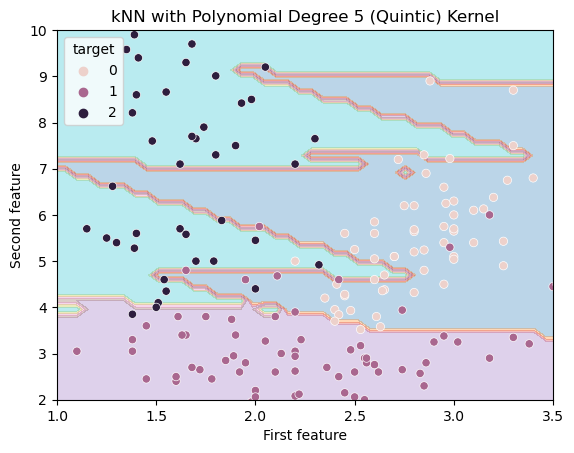

In [59]:
labels = evaluate_kernel_model(quintic_dt, quintic_kernel_function, X_train, grid)
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('kNN with Polynomial Degree 5 (Quintic) Kernel');
plt.savefig('KNN with Polynomial Degree 5 (Quintic) Kernel')

In [60]:
acc1_Qdt=  quintic_knn.score (quintic_kernel_matrix, y_train)
print ("score of KNN classification with polynomial quantic kernel is : {:.2f}".format (acc1_Ql))

score of KNN classification with polynomial quantic kernel is : 0.91


In [69]:
cls_report= classification_report (y_train, quintic_knn.predict (quintic_kernel_matrix))
print (cls_report)

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        44
           1       0.96      0.87      0.91        53
           2       0.83      0.69      0.76        36

    accuracy                           0.82       133
   macro avg       0.83      0.81      0.81       133
weighted avg       0.84      0.82      0.82       133

